In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data wrangling

data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.columns.tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [4]:
data.isnull().sum() #return missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.nunique(axis=0)# returns the number of unique values for each variable.

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data['target'].value_counts() #Had a good balance between the two binary outputs.

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

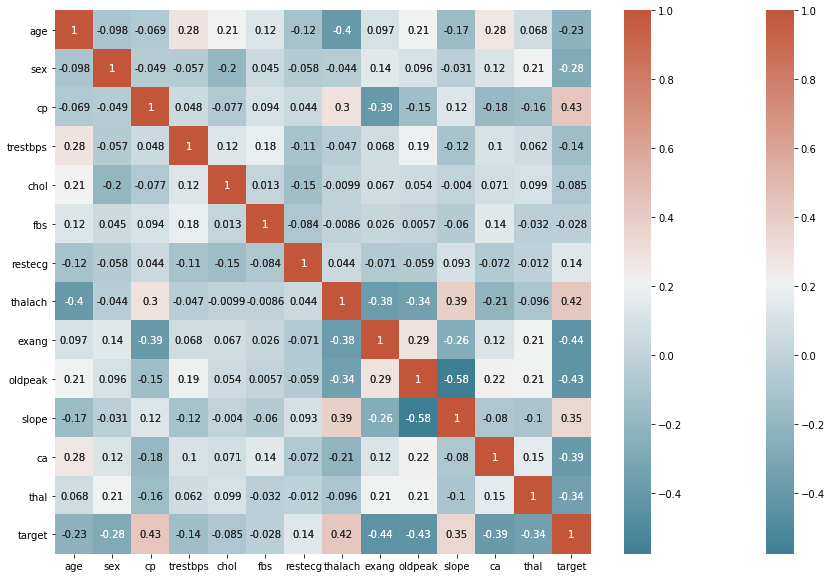

In [9]:
#correlation

corr = data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

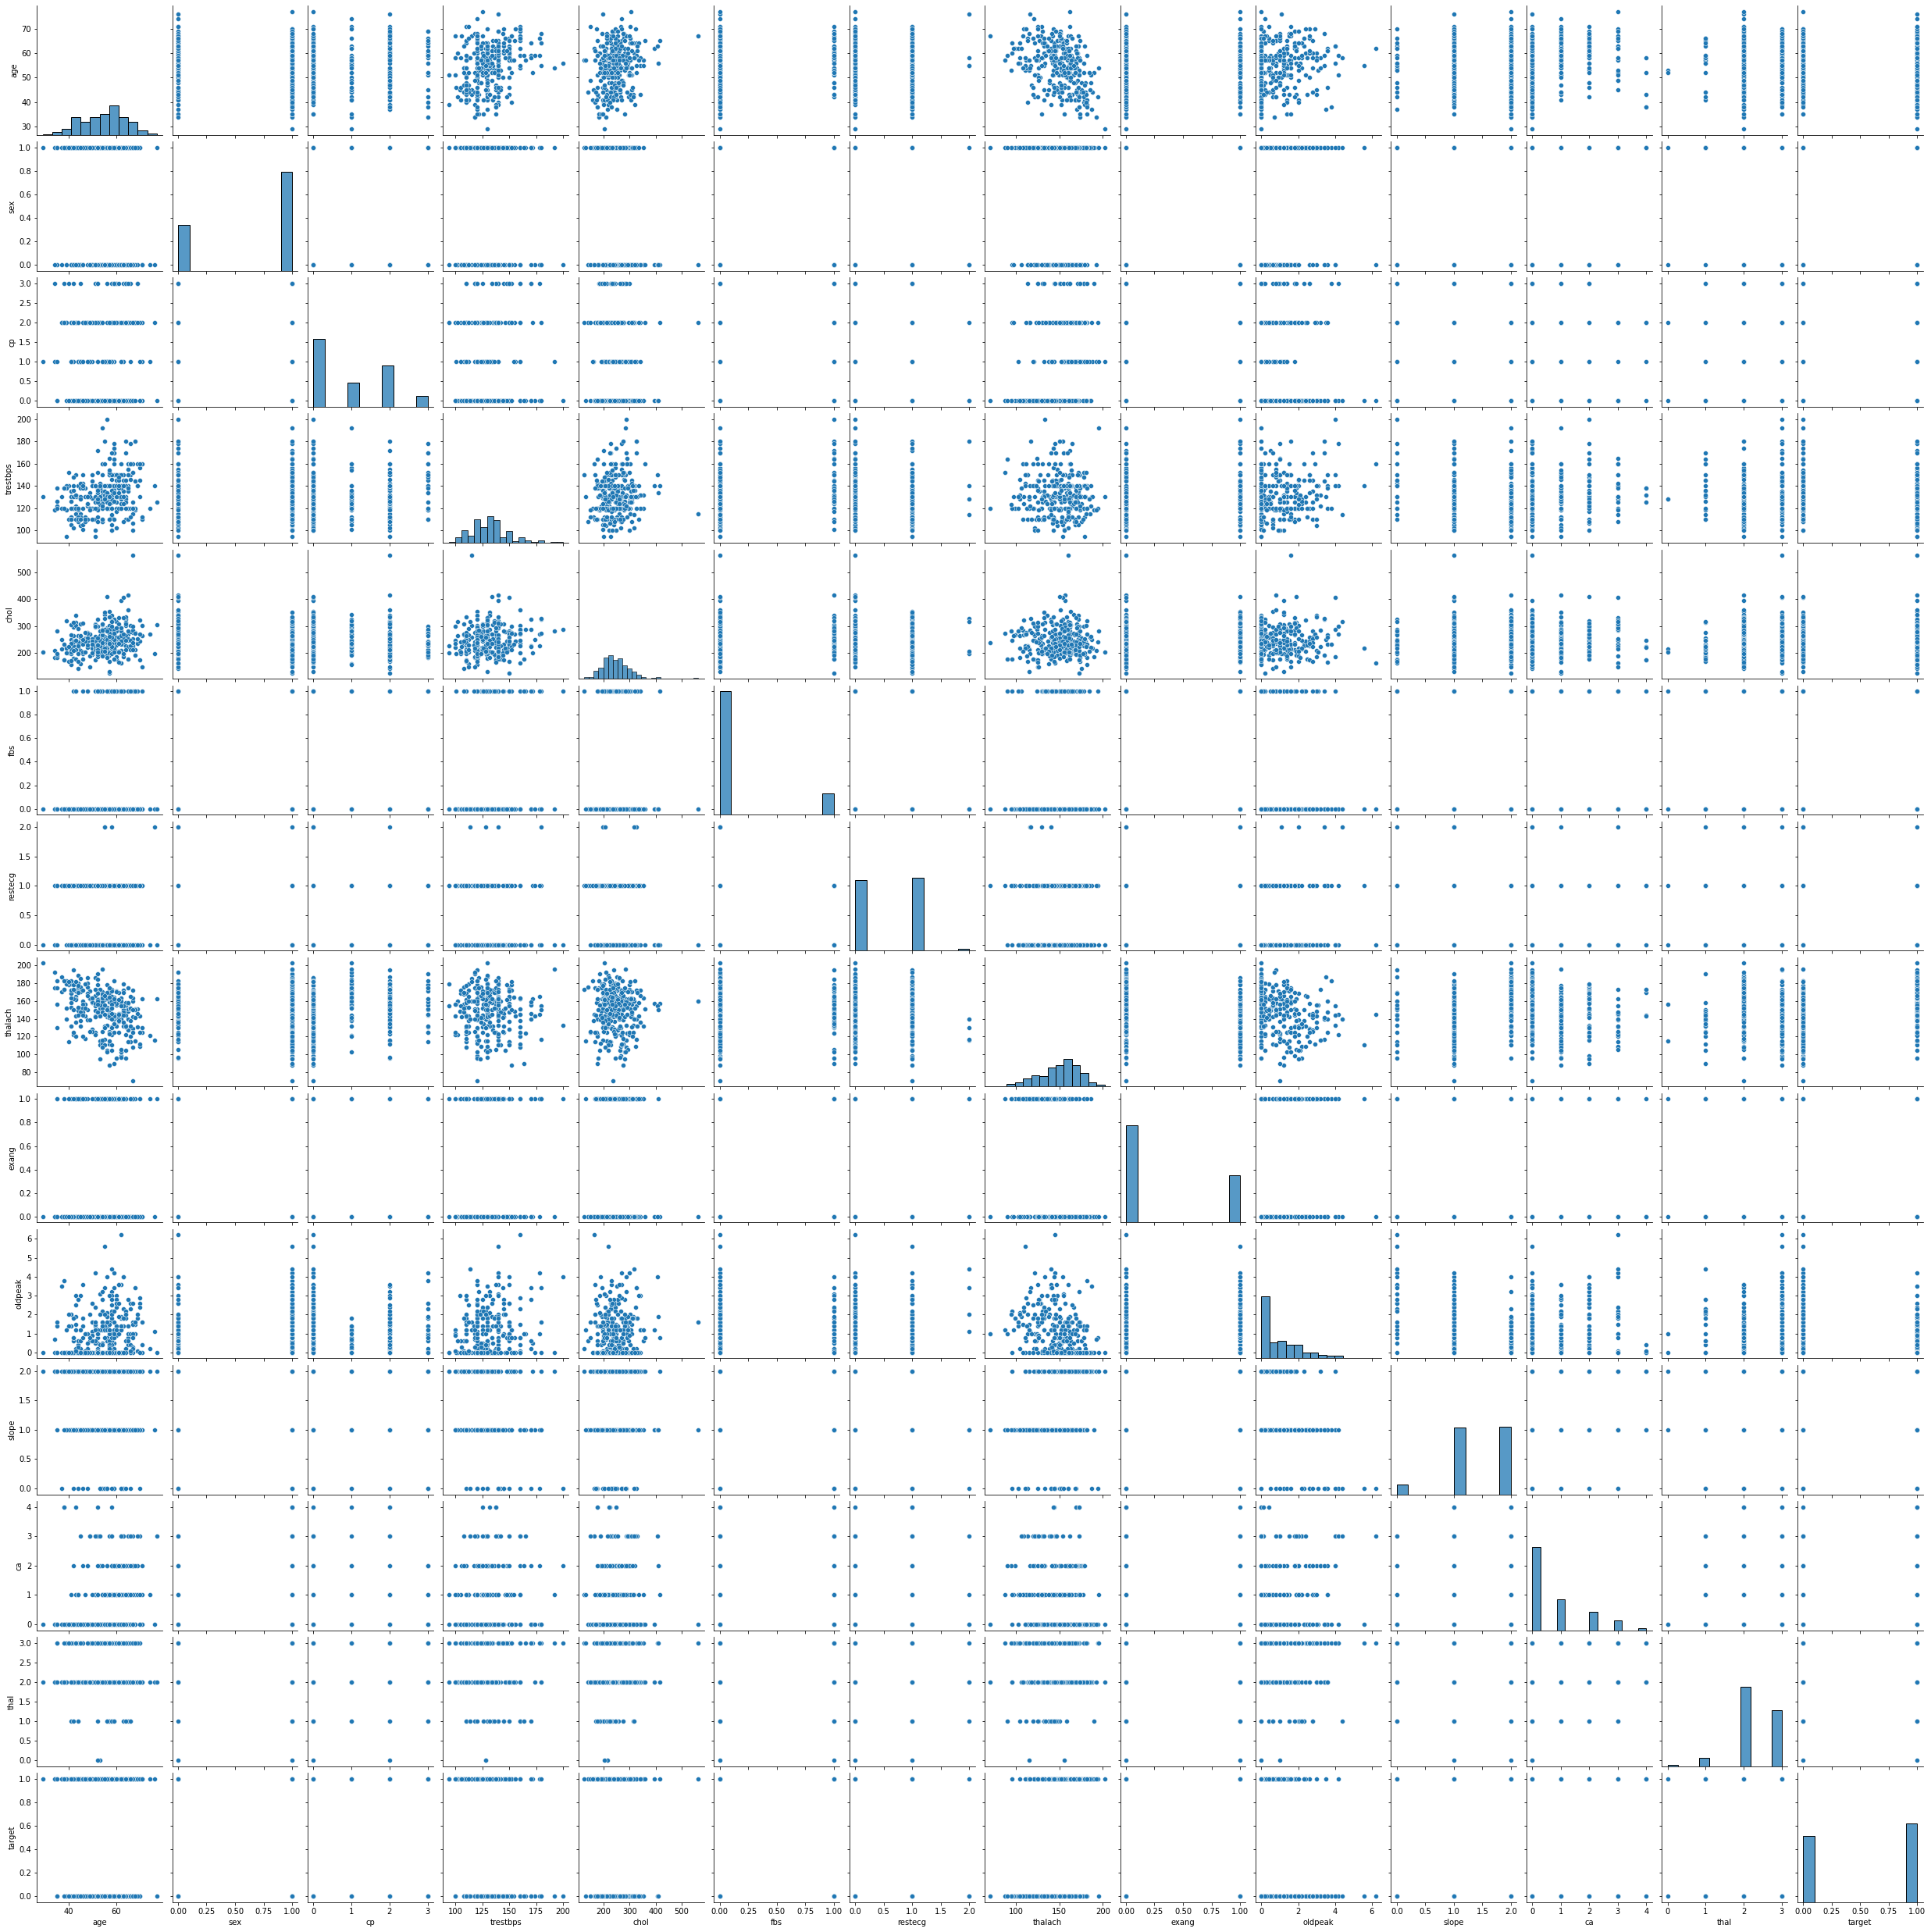

In [10]:
import seaborn as sns
sns.pairplot(data)

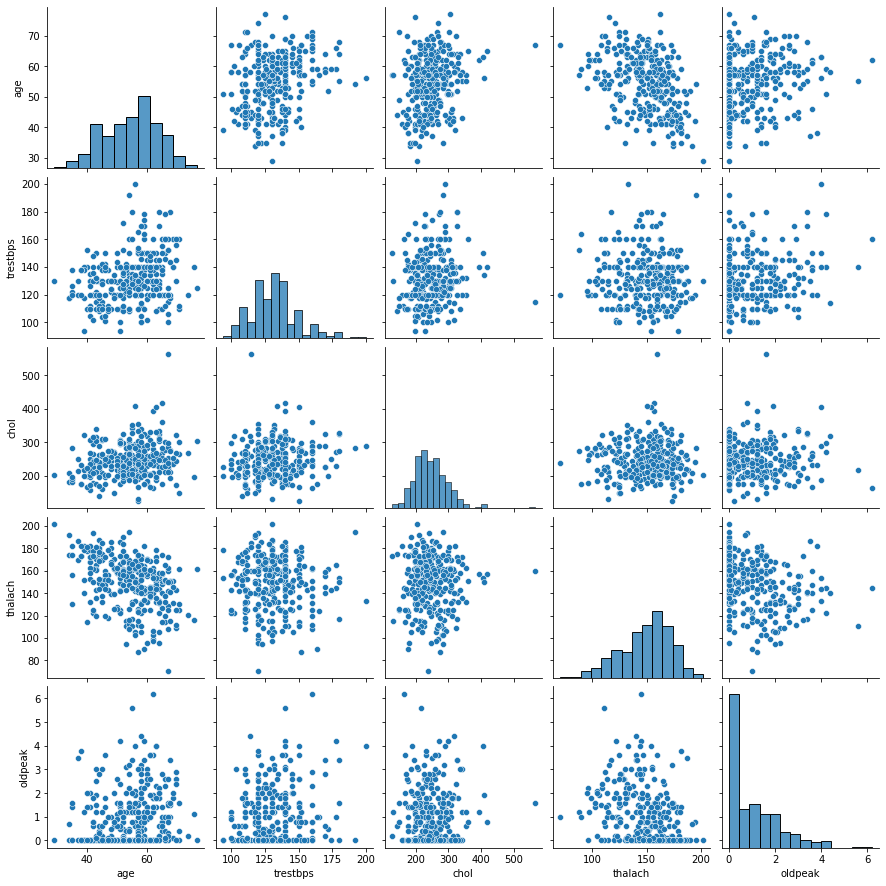

In [11]:
subData = data[['age','trestbps','chol','thalach','oldpeak']] #continous data columns
sns.pairplot(subData)

Text(10.778541666666662, 0.5, 'ST depression')

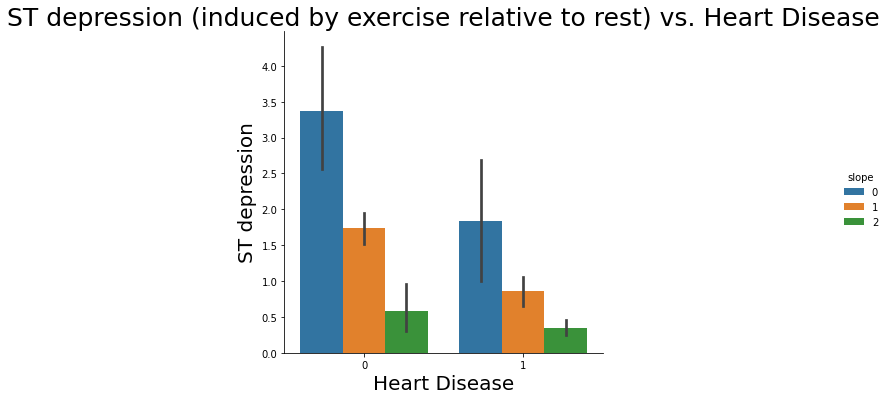

In [12]:
#choosing smaller pairplot --> oldpeak
sns.catplot(x="target", y="oldpeak", hue="slope", kind="bar", data=data);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'Thalach Level')

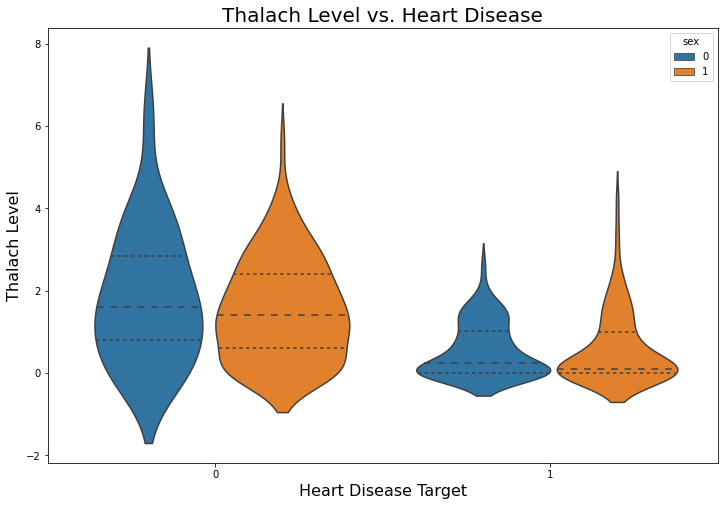

In [13]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'target', y= 'oldpeak',hue="sex", inner='quartile',data= data )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

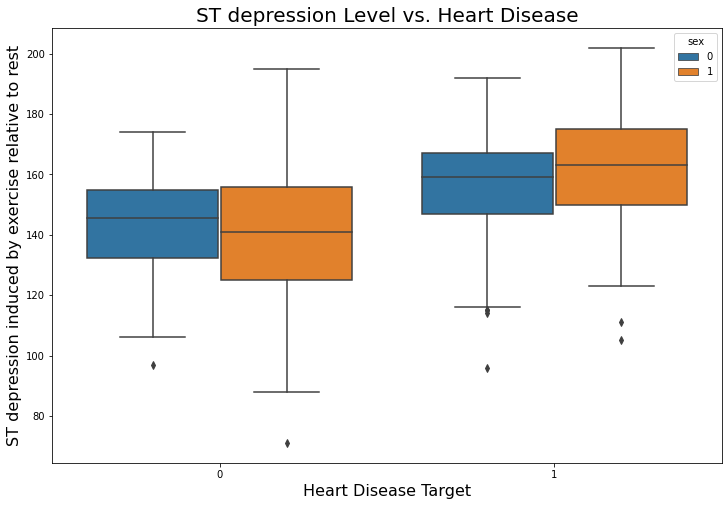

In [14]:
#for removing outliers
plt.figure(figsize=(12,8))
sns.boxplot(x= 'target', y= 'thalach',hue="sex", data=data )
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [15]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = data[data['target']==1]
pos_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [16]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = data[data['target']==0]
neg_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [17]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 0.583030303030303
(Negative Patients ST depression): 1.5855072463768116


In [18]:
print("(Positive Patients thalach): " + str(pos_data['thalach'].mean()))
print("(Negative Patients thalach): " + str(neg_data['thalach'].mean()))

(Positive Patients thalach): 158.46666666666667
(Negative Patients thalach): 139.1014492753623


In [19]:
#Assign the 13 features to X, & the last column to our classification predictor, y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
#split: the data set into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [21]:
#Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)# get instance of model
model.fit(x_train, y_train) # Train/Fit model 

y_pred = model.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred)) # output accuracy #F1 score reaches its best value at 1 and worst value at 0.


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred) #accuracy above 70% is considered good

[[21  9]
 [ 3 28]]


0.8032786885245902

In [24]:
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.07814
Feature: 1, Score: 0.04206
Feature: 2, Score: 0.16580
Feature: 3, Score: 0.07477
Feature: 4, Score: 0.07587
Feature: 5, Score: 0.00828
Feature: 6, Score: 0.02014
Feature: 7, Score: 0.12772
Feature: 8, Score: 0.06950
Feature: 9, Score: 0.09957
Feature: 10, Score: 0.04677
Feature: 11, Score: 0.11667
Feature: 12, Score: 0.07473


<AxesSubplot:>

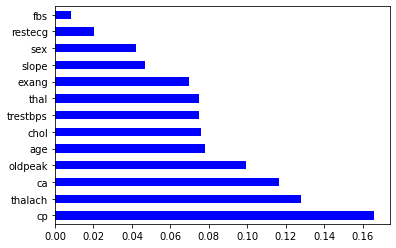

In [25]:
index= data.columns[:-1]
importance = pd.Series(importance, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

In [26]:
#From the Feature Importance graph above, we can conclude that the top 4 significant features were 
# chest pain type (cp)
# maximum heart rate achieved (thalach)
# number of major vessels (ca)
# ST depression induced by exercise relative to rest (oldpeak).

In [27]:
print(model.predict(sc.transform([[49,1,1,130,266,0,1,171,0,0.6,2,0,2]])))

[1]


In [28]:
#First value represents our predicted value, Second value represents our actual value.
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]]


In [29]:
import pickle
filename = 'Model'
outfile = open(filename,'wb')
pickle.dump(model,outfile)
outfile.close()